In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chinese-mnist/chinese_mnist.csv
/kaggle/input/chinese-mnist/chinese_mnist.tfrecords
/kaggle/input/chinese-mnist/data/data/input_3_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_29_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_86_3_5.jpg
/kaggle/input/chinese-mnist/data/data/input_67_10_4.jpg
/kaggle/input/chinese-mnist/data/data/input_35_4_4.jpg
/kaggle/input/chinese-mnist/data/data/input_58_7_5.jpg
/kaggle/input/chinese-mnist/data/data/input_49_4_9.jpg
/kaggle/input/chinese-mnist/data/data/input_1_1_12.jpg
/kaggle/input/chinese-mnist/data/data/input_86_1_9.jpg
/kaggle/input/chinese-mnist/data/data/input_71_3_8.jpg
/kaggle/input/chinese-mnist/data/data/input_32_2_3.jpg
/kaggle/input/chinese-mnist/data/data/input_71_1_13.jpg
/kaggle/input/chinese-mnist/data/data/input_87_2_12.jpg
/kaggle/input/chinese-mnist/data/data/input_63_1_10.jpg
/kaggle/input/chinese-mnist/data/data/input_71_10_2.jpg
/kaggle/input/chinese-mnist/data/data/input_22_10_4.jpg
/kaggle/input/c

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# **Reading the Dataset and Gaining Insights**

In [3]:
data=pd.read_csv("/kaggle/input/chinese-mnist/chinese_mnist.csv")

In [4]:
data.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [5]:
data.tail()

,suite_id,sample_id,code,value,character
14995,99,5,9,8,八
14996,99,6,9,8,八
14997,99,7,9,8,八
14998,99,8,9,8,八
14999,99,9,9,8,八


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [7]:
data.describe()

,suite_id,sample_id,code,value
count,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,50.500000,5.500000,8.000000,6.667410e+06
std,28.867032,2.872377,4.320638,2.494502e+07
min,1.000000,1.000000,1.000000,0.000000e+00
25%,25.750000,3.000000,4.000000,3.000000e+00
50%,50.500000,5.500000,8.000000,7.000000e+00
75%,75.250000,8.000000,12.000000,1.000000e+02
max,100.000000,10.000000,15.000000,1.000000e+08


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().any()

suite_id     False
sample_id    False
code         False
value        False
character    False
dtype: bool

In [10]:
data.isna().sum()

suite_id     0
sample_id    0
code         0
value        0
character    0
dtype: int64

# **Adding the File path for respective Images**

In [11]:
IMAGE_PATH = "../input/chinese-mnist/data/data/"
print("Dataframe Rows:", data.shape[0]) 
print("Image files :", len(os.listdir(IMAGE_PATH)))

Dataframe Rows: 15000
Image files : 15000


In [12]:
def file_path_col(data):    
    file_path = f"input_{data[0]}_{data[1]}_{data[2]}.jpg"
    return file_path

data["file_path"] = data.apply(file_path_col, axis = 1)
data.head()

,suite_id,sample_id,code,value,character,file_path
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


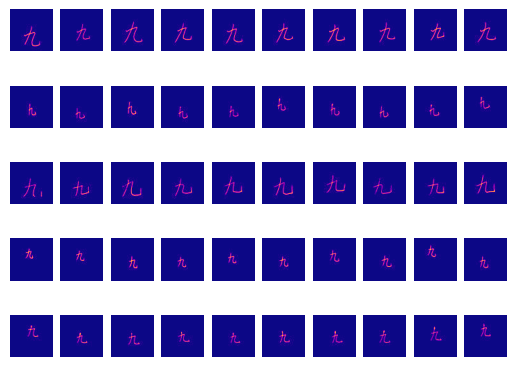

In [13]:
for i in range(50):
    path = os.path.join(IMAGE_PATH, data['file_path'][i])
    path_img = imread(path)
    plt.subplot(5,10, i+1)  
    plt.imshow(path_img, cmap='plasma')
    plt.axis('off')

plt.show()

# **Splitting the Dataset**

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=0, stratify=data["code"].values, shuffle = True)

### **Splitting the Train Dataset further into train and validation dataset**

In [15]:
train_data, val_data = train_test_split(train, test_size=0.2, random_state=0, stratify=train["code"].values, shuffle = True)

### **Printing number of data points in each set**

In [16]:

print(train.shape[0])
print(test.shape[0])
print(train_data.shape[0])
print(val_data.shape[0])

12000
3000
9600
2400


### **

In [17]:

import skimage.io
import skimage.transform

def read_image(file_name):
    path = os.path.join(IMAGE_PATH, file_name)
    
    image = skimage.io.imread(path)
    image = skimage.transform.resize(image, (64, 64, 1), mode='reflect')
    '''This function takes a file name as input and reads the corresponding image using skimage.io.imread. 
    The image is then resized to a shape of (64, 64, 1) using skimage.transform.resize. 
    The mode='reflect' parameter specifies the padding mode during resizing. 
    Finally, the function returns the resized image.'''
    
    return image[:,:,:]
    '''By using image[:, :, :], the code is effectively selecting all rows, all columns, and all channels of the image, and returning the resulting array.
    This is to ensure that the returned image has the same shape as the input, without any modifications or cropping. 
    It allows the code to return the entire image array without any specific subsetting or manipulation.'''


def character_encoder(dataset, var='character'):
    X = np.stack(dataset['file_path'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y
'''This function takes a dataset as input, along with an optional var parameter.
It uses the read_image function defined earlier to read and resize the images corresponding to the file paths in the dataset. 
It does this by applying the read_image function to each file path in the dataset using the apply method. 
The resulting images are stacked together using np.stack to create the input feature array X.
The function then encodes the target variable (var) using one-hot encoding. 
It uses pd.get_dummies to convert the categorical variable into dummy/indicator variables. 
The resulting one-hot encoded labels are stored in the target array y'''
X_train, y_train = character_encoder(train)
X_val, y_val = character_encoder(val_data)
X_test, y_test = character_encoder(test)

print(X_train.shape, ",", y_train.shape)
print(X_val.shape, ",", y_val.shape)
print(X_test.shape, ",", y_test.shape)

(12000, 64, 64, 1) , (12000, 15)
(2400, 64, 64, 1) , (2400, 15)
(3000, 64, 64, 1) , (3000, 15)


In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=X_train.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(164, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 12s 25ms/step - loss: 1.3848 - accuracy: 0.5273 - val_loss: 0.3688 - val_accuracy: 0.8808
Epoch 2/20
94/94 [==============================] - 2s 16ms/step - loss: 0.3325 - accuracy: 0.8872 - val_loss: 0.1948 - val_accuracy: 0.9312
Epoch 3/20
94/94 [==============================] - 2s 17ms/step - loss: 0.1718 - accuracy: 0.9447 - val_loss: 0.1232 - val_accuracy: 0.9617
Epoch 4/20
94/94 [==============================] - 2s 16ms/step - loss: 0.1194 - accuracy: 0.9630 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 5/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0796 - accuracy: 0.9765 - val_loss: 0.0485 - val_accuracy: 0.9892
Epoch 6/20
94/94 [==============================] - 1s 16ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0303 - val_accuracy: 0.9937
Epoch 7/20
94/94 [==============================] - 2s 16ms/step - loss: 0.0538 - accuracy: 0.9846 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 8/20
9

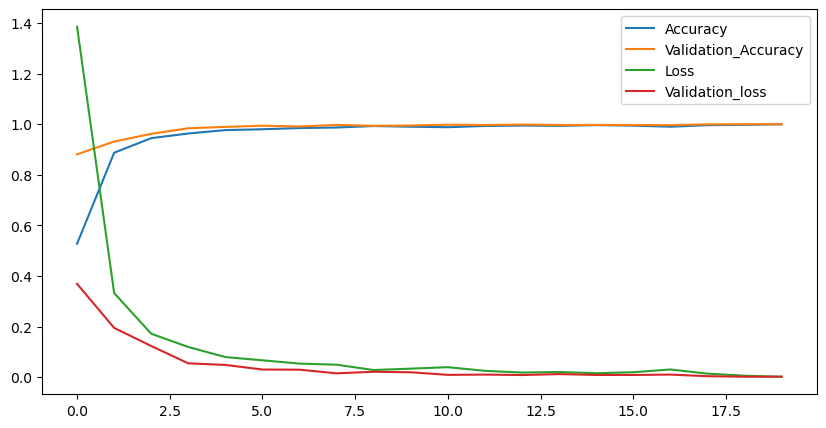

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy', linestyle='-')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_loss', linestyle='-')
plt.legend()

In [21]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy*100} %')

94/94 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9957
Test Loss is 0.020432032644748688
Test Accuracy is 99.56666827201843 %
